# Task 1. Analyze the dataset

## Import libraries

In [1]:
%load_ext autoreload
%autoreload 2

from glob import glob
import cv2
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set_theme()
import pandas as pd
import os

# Library needed to get the image annotations
from fashionpedia.fp import Fashionpedia
# ================================================================================================

import platform
import sys

print(f"Python Platform: {platform.platform()}")
print(f"Python {sys.version}\n")
print(f"OpenCV {cv2.__version__}")
print(f"Numpy {np.__version__}")
print(f"Matplotlib {matplotlib.__version__}")
print(f"Seaborn {sns.__version__}")
print(f"Pandas {pd.__version__}")

Python Platform: Windows-10-10.0.22631-SP0
Python 3.8.19 (default, Mar 20 2024, 19:55:45) [MSC v.1916 64 bit (AMD64)]

OpenCV 4.9.0
Numpy 1.24.3
Matplotlib 3.7.5
Seaborn 0.13.2
Pandas 2.0.3


## Set the environment

In [4]:

# Select local or Google Colab environment
# ---------------------------------------------------------------------------
env = ["local", "colab"][0]
print(f"Selected Environment: {env}")

# ---------------------------------------------------------------------------
if env == "colab":
    from google.colab import drive # type: ignore
    drive.mount('/content/drive')
    data_dir = "/content/drive/MyDrive/OR/P2/_data/"
    src_dir = "/content/drive/MyDrive/OR/P2/src/"
    
elif env == "local":
    src_dir = "../src"
    data_dir = "../_data/"


sys.path.append(src_dir)
fashion_dir = data_dir + "fashionpedia/"
img_dir = fashion_dir + 'img_dir/'

# ---------------------------------------------------------------------------
# Set models and figures directories
models_dir = fashion_dir + '_models/'
figures_dir = fashion_dir + '_figures/'
annotations_dir = fashion_dir + 'ann_dir/'
# ---------------------------------------------------------------------------

# Which masks do you want to generate?
train_or_val = ['train', 'val'][0]
anno_file = f"{annotations_dir}instances_attributes_{train_or_val}2020.json"
img_root = f"{img_dir}{train_or_val}"
mask_dir = annotations_dir + f"mask_{train_or_val}/"


classes = ('background', 'shirt, blouse', 'top, t-shirt, sweatshirt', 'sweater', 'cardigan', 'jacket', 'vest', 'pants', 'shorts', 'skirt', 'coat', 'dress', 'jumpsuit', 'cape', 'glasses', 'hat', 'headband, head covering, hair accessory', 'tie', 'glove', 'watch', 'belt', 'leg warmer', 'tights, stockings', 'sock', 'shoe', 'bag, wallet', 'scarf', 'umbrella', 'hood', 'collar', 'lapel', 'epaulette', 'sleeve', 'pocket', 'neckline', 'buckle', 'zipper', 'applique', 'bead', 'bow', 'flower', 'fringe', 'ribbon', 'rivet', 'ruffle', 'sequin', 'tassel')

Selected Environment: local


## Generate masks

In [28]:
# Which masks do you want to generate?
train_or_val = ['train', 'val'][1]
anno_file = annotations_dir + f"instances_attributes_{train_or_val}2020.json"
img_root = annotations_dir + f"{train_or_val}"

fp = Fashionpedia(anno_file)

loading annotations into memory...
Done (t=0.27s)
creating index...
index created!
loading attributes...
attributes index created!


In [29]:
cats = fp.loadCats(fp.getCatIds())
cat_names =[cat['name'] for cat in cats]
print(cat_names)
print('Fashionpedia categories: \n{}\n'.format(', '.join(cat_names)))

['shirt, blouse', 'top, t-shirt, sweatshirt', 'sweater', 'cardigan', 'jacket', 'vest', 'pants', 'shorts', 'skirt', 'coat', 'dress', 'jumpsuit', 'cape', 'glasses', 'hat', 'headband, head covering, hair accessory', 'tie', 'glove', 'watch', 'belt', 'leg warmer', 'tights, stockings', 'sock', 'shoe', 'bag, wallet', 'scarf', 'umbrella', 'hood', 'collar', 'lapel', 'epaulette', 'sleeve', 'pocket', 'neckline', 'buckle', 'zipper', 'applique', 'bead', 'bow', 'flower', 'fringe', 'ribbon', 'rivet', 'ruffle', 'sequin', 'tassel']
Fashionpedia categories: 
shirt, blouse, top, t-shirt, sweatshirt, sweater, cardigan, jacket, vest, pants, shorts, skirt, coat, dress, jumpsuit, cape, glasses, hat, headband, head covering, hair accessory, tie, glove, watch, belt, leg warmer, tights, stockings, sock, shoe, bag, wallet, scarf, umbrella, hood, collar, lapel, epaulette, sleeve, pocket, neckline, buckle, zipper, applique, bead, bow, flower, fringe, ribbon, rivet, ruffle, sequin, tassel



In [30]:
im_ids = fp.getImgIds()

for im_id in im_ids:
  ann_ids = np.array(fp.getAnnIds(imgIds=im_id))

  cat_ids = []
  for i in ann_ids:
	  cat_ids.append(fp.anns[i]['category_id']+1)

  ann_ids = ann_ids[np.argsort(cat_ids)]

  mask = None
  for i in ann_ids:
    m = (fp.anns[i]['category_id']+1)*fp.annToMask(fp.anns[i])
    mm = (m>0).astype(np.uint8)
    if mask is None:
      mask = m
    else:
      mask = mask*(1-mm) + m

  name = fp.imgs[im_id]['file_name'].split('.')[0]+'_seg.png'
  cv2.imwrite(annotations_dir + f'{train_or_val}/'+name, mask)
  print('file ' + name + ' has been written.')

file e14733841b04c64e75789a91fbe549b3_seg.png has been written.
file b4f6d9c2696573ff0cfc05070d17b5b6_seg.png has been written.
file 8075d3afc3d574f8cfd7c5400417d9fc_seg.png has been written.
file 32e566cd7c0388f44f1a09e10e2ac96c_seg.png has been written.
file 0229bef01efc25f915374d55f59cbfdd_seg.png has been written.
file 5c0eaf59c2eaf693980708f24a6b818a_seg.png has been written.
file 90b68fc59a4b48dad4be10eeaef7205f_seg.png has been written.
file 7fc8a54146a81b33f348f21ad07fa141_seg.png has been written.
file db754979155507a6528eeb152a0adaf9_seg.png has been written.
file ecb9073d265f18598c61f21d10098339_seg.png has been written.
file f06777ee045a0762aad3a7ec3111b864_seg.png has been written.
file 8ffb6a0c280839553fa4025f3135d178_seg.png has been written.
file 3f18271f3f7d101e2f9a27b0b12b034b_seg.png has been written.
file c87fb99e4cbb5a408e8fa1f4d86f9204_seg.png has been written.
file c4495c86c19fedfdf2fefb74d43fdd6d_seg.png has been written.
file ac453fbad1af6923ae38db5e33512e2b_se

## Analyze the data

### Read Objects

#### Train annotations

In [6]:
from utils.data import read_annotations

train_file = f"{annotations_dir}instances_attributes_train2020.json"
test_file = f"{annotations_dir}instances_attributes_val2020.json"

# import pandas as pd
train_merged_df, train_categories, train_img, train_annotations = read_annotations(train_file)
test_merged_df, test_categories, test_img, test_annotations = read_annotations(test_file)
train_merged_df.head()


,image_id,category_id,attribute_ids,segmentation,bbox,area,width,height,file_name,img_area,area_ratio
0,16305,32,[218],"[[471, 390, 461, 412, 457, 430, 454, 455, 454,...","[454.0, 390.0, 46.0, 109.0]",3052,680,1024,2f10b4d61e445fe5d0777723630a2905.jpg,696320,0.004383
1,16305,31,"[204, 205, 159]","[[334, 329, 344, 307, 348, 293, 354, 282, 365,...","[271.0, 133.0, 98.0, 223.0]",12906,680,1024,2f10b4d61e445fe5d0777723630a2905.jpg,696320,0.018535
2,16305,31,"[205, 159]","[[522, 331, 523, 355, 515, 376, 510, 382, 512,...","[482.0, 323.0, 74.0, 169.0]",5794,680,1024,2f10b4d61e445fe5d0777723630a2905.jpg,696320,0.008321
3,16305,22,[],"[[348, 745, 356, 731, 364, 719, 376, 704, 392,...","[322.0, 658.0, 208.0, 112.0]",3838,680,1024,2f10b4d61e445fe5d0777723630a2905.jpg,696320,0.005512
4,16305,22,[],"[[466, 771, 483, 765, 489, 762, 492, 758, 494,...","[405.0, 749.0, 97.0, 213.0]",9415,680,1024,2f10b4d61e445fe5d0777723630a2905.jpg,696320,0.013521


#### Merge train and test

In [7]:
# Merge the two dataframes vertically
merged_df = pd.concat([train_merged_df, test_merged_df], axis=0)
merged_df.reset_index(drop=True, inplace=True)

# Concat the rest
annotations = pd.concat([train_annotations, test_annotations], axis=0)
categories = pd.concat([train_categories, train_categories], axis=0)
imgs = pd.concat([train_img, test_img], axis=0)

#### Plot sample images



In [9]:
def plot_raw_segmented_image(image_info, image_path, figsize=(15, 15)):

    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    
    
    masked_image = image.copy()

    encoded_pixels = image_info["segmentation"]
    class_ids = image_info["category_id"]

    # Plot the original image
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    axs[0].imshow(image)
    axs[0].axis("off")

    mask = np.zeros_like(image[:, :, 0])
    for pixels, class_id in zip(encoded_pixels, class_ids):
        # Create a mask for the current segment
        vertices = np.array(pixels).reshape((-1, 2)).astype(np.int32)
        cv2.fillPoly(mask, [vertices], 255 - class_id * 4)

    axs[1].imshow(image)
    axs[1].imshow(mask, alpha=0.8)
    
    # Axis off
    axs[1].axis("off")
    
    # plt.axis("off")
    plt.show()

def aggregate_rows(group):
    instances = {
        'category_id': [],
        'attribute_ids': [],
        'segmentation': [],
        'bbox': [],
        'area': [],
        'width': [],
        'height': [],
        'file_name': None,
        'img_area': [],
        'area_ratio': [],
        'foreground_area': 0
    }
    for _, row in group.iterrows():
        instances['category_id'].append(row['category_id'])
        instances['attribute_ids'].extend(row['attribute_ids'])
        instances['segmentation'].extend(row['segmentation'])
        instances['bbox'].extend(row['bbox'])
        instances['area'].append(row['area'])
        instances['width'].append(row['width'])
        instances['height'].append(row['height'])
        if instances['file_name'] is None:
            instances['file_name'] = row['file_name']
        instances['img_area'].append(row['img_area'])
        instances['area_ratio'].append(row['area_ratio'])
        instances['foreground_area'] += row['area']

    result_df = pd.DataFrame({'image_id': group['image_id'].iloc[0], 'instances': [instances]})
    return result_df


In [10]:
grouped_df_train = train_merged_df.groupby('image_id').apply(aggregate_rows)
grouped_df_train.reset_index(drop=True, inplace=True)

grouped_df_train.head()


   image_id                                          instances
0        23  {'category_id': [23, 23, 33, 10], 'attribute_i...
1        25  {'category_id': [2, 33, 31, 31, 13, 7, 22, 22,...
2        26  {'category_id': [13, 29, 28, 32, 32, 31, 31, 0...
3        27  {'category_id': [6, 23, 23, 31, 31, 4, 1, 35, ...
4        28  {'category_id': [10, 32, 35, 31, 4, 29, 33], '...


In [11]:
from utils.draw import plot_seg_image, generate_palette

In [13]:
samples = 1
train_images_path = os.path.join(fashion_dir, "train")

for _ in range(samples):
    random_id = grouped_df_train.sample().index[0]
    print("Image ID:", random_id)
    image_path = os.path.join(train_images_path, grouped_df_train.iloc[random_id]['instances']["file_name"])
    print("Image path:", image_path)
    image_info = grouped_df_train.iloc[random_id]['instances']
    print("Image info:", image_info)

    plot_raw_segmented_image(image_info, image_path)

Image ID: 6077
Image path: ../_data/fashionpedia/train\18b3d2f09777a6504e0097911fabb2cb.jpg
Image info: {'category_id': [27, 32, 32, 32, 31, 31, 17, 17, 6, 23, 23, 25, 32, 9], 'attribute_ids': [219, 160, 204, 160, 204, 316, 317, 38, 295, 135, 115, 230, 219, 317, 85, 136, 149, 289, 311, 115, 145, 229], 'segmentation': [[491, 233, 499, 219, 506, 211, 511, 205, 517, 203, 523, 202, 530, 203, 533, 206, 531, 210, 533, 212, 536, 224, 539, 239, 540, 243, 549, 242, 554, 240, 556, 234, 556, 225, 556, 215, 556, 203, 552, 195, 549, 188, 545, 183, 536, 180, 533, 178, 531, 178, 527, 173, 524, 170, 519, 167, 514, 166, 510, 165, 503, 165, 497, 173, 492, 184, 489, 193, 485, 202, 481, 207, 478, 215, 471, 224, 471, 235, 474, 240, 478, 244, 484, 244, 489, 237], [533, 323, 537, 324, 538, 309, 542, 289, 537, 287, 534, 313], [547, 359, 555, 359, 552, 354, 552, 344, 551, 338, 551, 335, 547, 331, 538, 330, 544, 338, 547, 344, 548, 349, 547, 355], [464, 358, 466, 361, 471, 359, 478, 350, 479, 352, 482, 351, 481

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


### Results

### Task 1  - Mean and variance full image

In [ ]:
print("Objects count:", pd.concat([train_annotations, test_annotations], axis=0).shape[0])
print("Images count:", pd.concat([train_img, test_img], axis=0).shape[0])

print("Area ratio total mean:", merged_df['area_ratio'].mean())
print("Area ratio total variance:", merged_df['area_ratio'].var())
# Initialize lists to store the calculated statistics
means = []
vars = []
stds = []

# Iterate over categories
for index, row in pd.concat([train_categories, test_categories], axis=0)[['id', 'name']].iterrows():
    category_id = row['id']
    category_name = row['name']

    area_ratio = merged_df[merged_df['category_id'] == category_id]['area_ratio']

    # Append calculated statistics to lists
    means.append(area_ratio.mean())
    vars.append(area_ratio.var())
    stds.append(area_ratio.std())

# Create a DataFrame to hold the statistics
statistics_df = pd.DataFrame({
    'Class': pd.concat([train_categories, test_categories], axis=0)['name'],
    'Mean': means,
    'Var': vars,
    'Std': stds
})

Objects count: 342182
Images count: 46781
Area ratio total mean: 0.034318633530872236
Area ratio total variance: 0.0064256909792262265


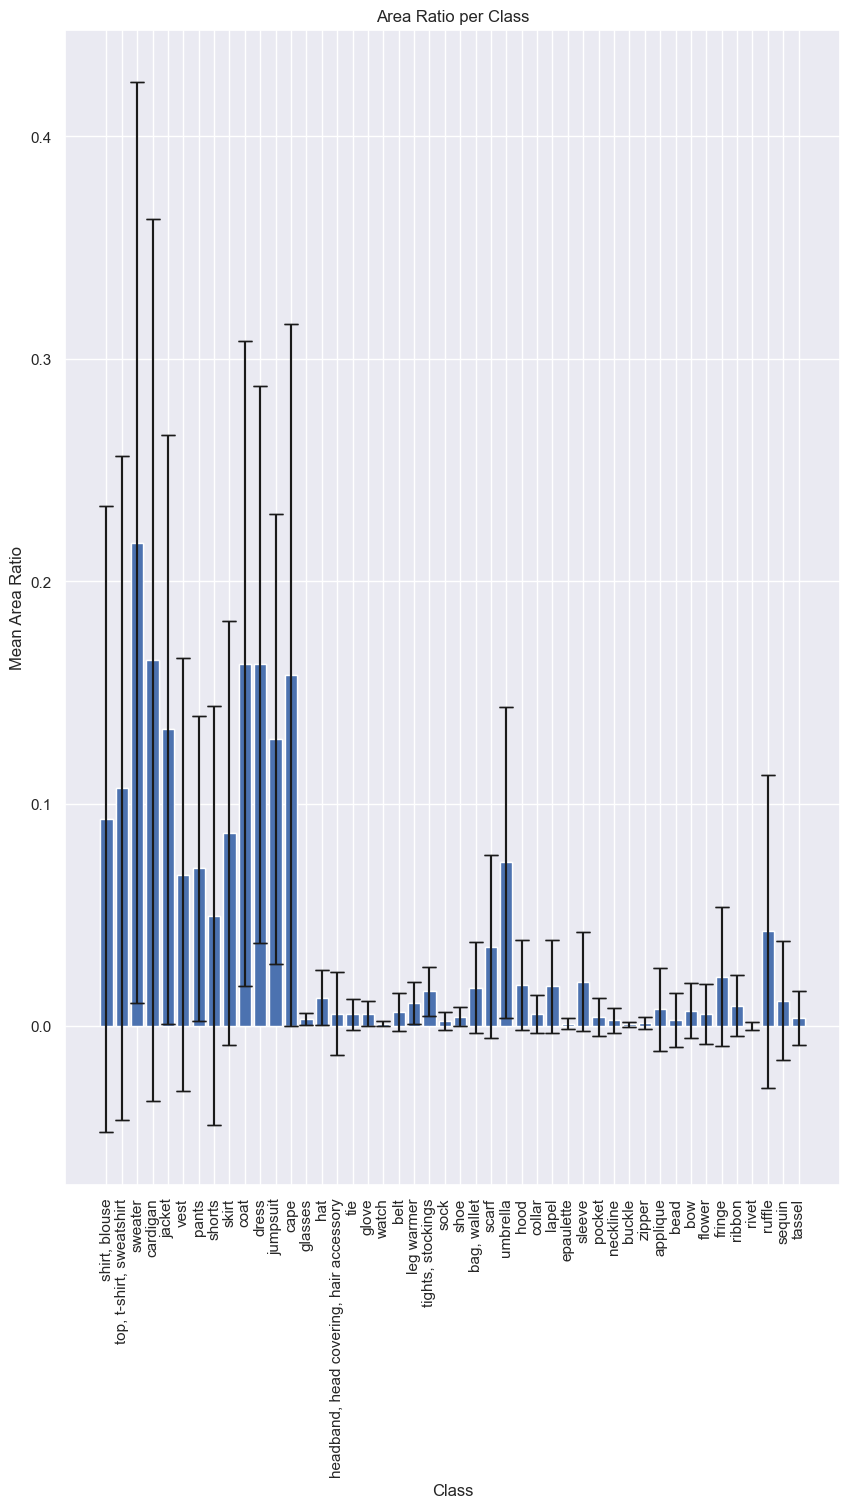

In [ ]:
plt.figure(figsize=(10, 15))
plt.bar(statistics_df['Class'], statistics_df['Mean'], yerr=statistics_df['Std'], capsize=5)
plt.xlabel('Class')
plt.ylabel('Mean Area Ratio')
plt.title('Area Ratio per Class')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)

In [14]:
# Plot unbalanced data
annotations = pd.concat([train_annotations, test_annotations], axis=0)
categories = pd.concat([train_categories, test_categories], axis=0)
group_cols = ['name', 'category_id']
df_train = pd.merge(train_annotations, train_categories, how='left', left_on='category_id', right_index=True)
df_counts_train = df_train.groupby(group_cols).agg({'image_id': 'count'}).reset_index()

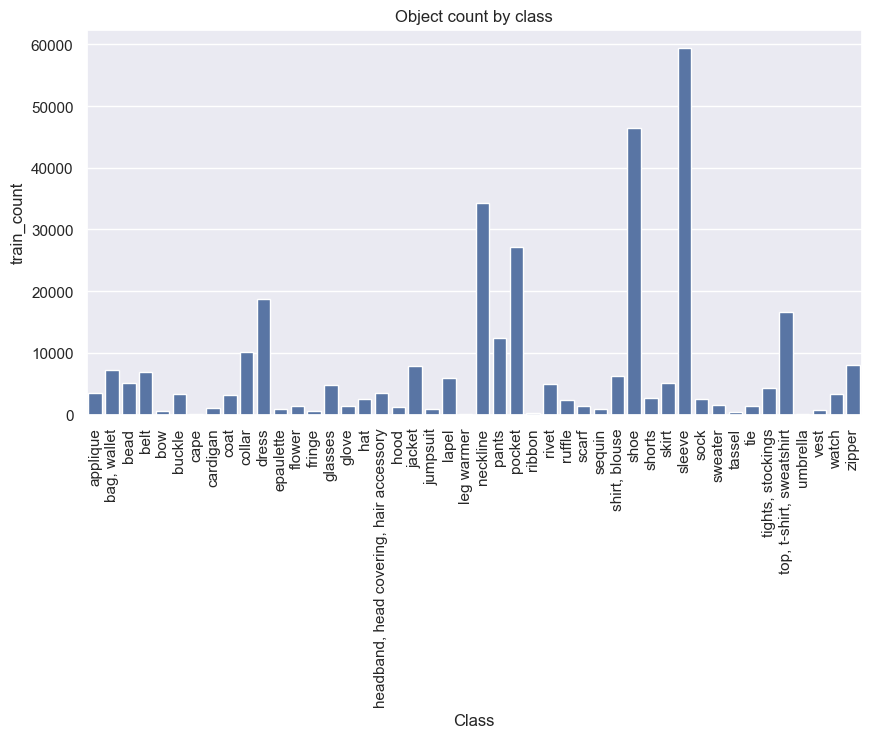

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=df_counts_train["Class"], y=df_counts_train["train_count"])
plt.xticks(rotation=90, ha='center')
plt.title('Object count by class')
plt.show()

In [15]:
print(classes)
print(len(classes))
print([255 - x * 4 for x in range(46)])

('background', 'shirt, blouse', 'top, t-shirt, sweatshirt', 'sweater', 'cardigan', 'jacket', 'vest', 'pants', 'shorts', 'skirt', 'coat', 'dress', 'jumpsuit', 'cape', 'glasses', 'hat', 'headband, head covering, hair accessory', 'tie', 'glove', 'watch', 'belt', 'leg warmer', 'tights, stockings', 'sock', 'shoe', 'bag, wallet', 'scarf', 'umbrella', 'hood', 'collar', 'lapel', 'epaulette', 'sleeve', 'pocket', 'neckline', 'buckle', 'zipper', 'applique', 'bead', 'bow', 'flower', 'fringe', 'ribbon', 'rivet', 'ruffle', 'sequin', 'tassel')
47
[255, 251, 247, 243, 239, 235, 231, 227, 223, 219, 215, 211, 207, 203, 199, 195, 191, 187, 183, 179, 175, 171, 167, 163, 159, 155, 151, 147, 143, 139, 135, 131, 127, 123, 119, 115, 111, 107, 103, 99, 95, 91, 87, 83, 79, 75]


### Mean and variance only foreground






In [19]:
grouped_merged_df = merged_df.groupby('image_id').apply(aggregate_rows)
grouped_merged_df.reset_index(drop=True, inplace=True)

In [20]:
# Initialize lists to store the calculated statistics
summary_dict = {}

for id in train_categories["id"]:
  summary_dict[id] = []

# Iterate over categories
for index, row in grouped_merged_df.iterrows():
    for id, area in enumerate(row['instances']['area']):
      id_name = row['instances']['category_id'][id]
      summary_dict[id_name].append(area / row['instances']['foreground_area'])

# Create a DataFrame to hold the statistics
statistics_df = pd.DataFrame({
    'Class': train_categories['name'],
    'Mean': [np.mean(summary_dict[i]) for i in summary_dict],
    'Var': [np.var(summary_dict[i]) for i in summary_dict],
    'Std': [np.std(summary_dict[i]) for i in summary_dict]})

In [21]:
plt.figure(figsize=(10, 15))
plt.bar(statistics_df['Class'], statistics_df['Mean'], yerr=statistics_df['Std'], capsize=5)
plt.xlabel('Class')
plt.ylabel('Area Ratio')
plt.title('Area Ratio in Foreground per Class')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()
# Image is not saved whole - plt.savefig(figures_dir + 'area_ratio_class')

In [ ]:
group_cols = ['name', 'category_id']

df_train = pd.merge(train_annotations, train_categories, how='left', left_on='category_id', right_index=True)
df_counts_train = df_train.groupby(group_cols).agg({'image_id': 'count'}).reset_index()
df_counts_train.columns = ['Class', 'category_id', 'train_count']

df_test = pd.merge(test_annotations, test_categories, how='left', left_on='category_id', right_index=True)
df_counts_test = df_test.groupby(group_cols).agg({'image_id': 'count'}).reset_index()
df_counts_test.columns = ['Class', 'category_id', 'test_count']

# Merge dataframes
df_counts = pd.merge(df_counts_train, df_counts_test, on=('Class', 'category_id'), how='outer')
for tipus, df in zip(['train', 'test'], [df_counts_train, df_counts_test]):
    df_counts[tipus+ "_rel"] = df[tipus+"_count"] / df[tipus+"_count"].sum()

stats_df = statistics_df.merge(df_counts, on='Class')
stats_df.to_csv(f"{fashion_dir}/area_ratio_foreground.csv", index=False)

stats_df

,Class,Mean,Var,Std,category_id,train_count,test_count,train_rel,test_rel
0,"shirt, blouse",0.278476,0.069919,0.264422,0,6161,102,0.018479,0.011616
1,"top, t-shirt, sweatshirt",0.367913,0.078930,0.280945,1,16548,477,0.049634,0.054322
2,sweater,0.490861,0.068965,0.262613,2,1494,21,0.004481,0.002392
3,cardigan,0.410632,0.047233,0.217333,3,1107,12,0.003320,0.001367
4,jacket,0.415557,0.022099,0.148659,4,7833,183,0.023494,0.020840
5,vest,0.268893,0.051059,0.225963,5,719,22,0.002157,0.002505
6,pants,0.323685,0.034259,0.185091,6,12414,314,0.037234,0.035759
7,shorts,0.252887,0.042927,0.207188,7,2756,106,0.008266,0.012072
8,skirt,0.432297,0.051800,0.227597,8,5046,162,0.015135,0.018449
9,coat,0.510717,0.026218,0.161919,9,3124,104,0.009370,0.011844
